In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('./diabetes.csv') #Đọc Dữ Liệu
df.head() # Lấy 5 dòng đầu tiên của dữ liệu


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info() # Thông tin về dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.duplicated().sum()# Kiểm tra dữ liệu trùng lặp



np.int64(0)

In [ ]:
df.isna().sum() #Kiểm Tra dữ liệu bị thiếu 0 tương ứng ko có dữ liệu thiếu

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe() # Thống kê mô tả dữ liệu (count là số lượng, mean là trung bình, std là độ lệch chuẩn, min là giá trị nhỏ nhất, 25%, 50%, 75% là các phân vị, max là giá trị lớn nhất)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts() # Thống kê số lượng các giá trị trong cột Outcome

Outcome
0    500
1    268
Name: count, dtype: int64

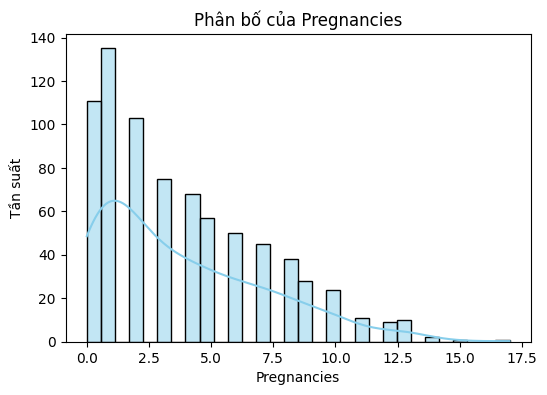

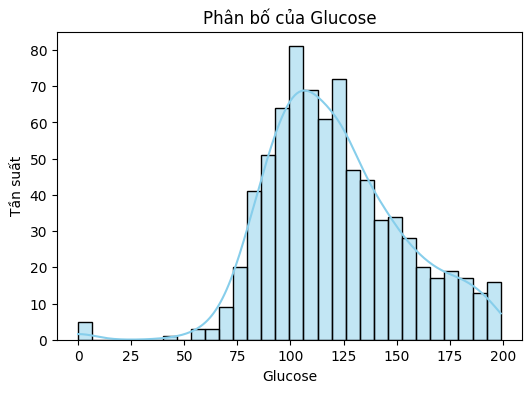

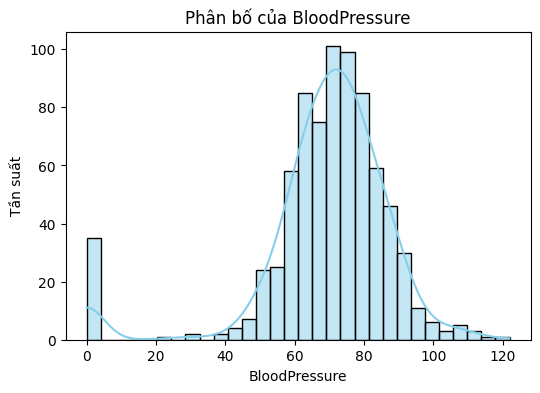

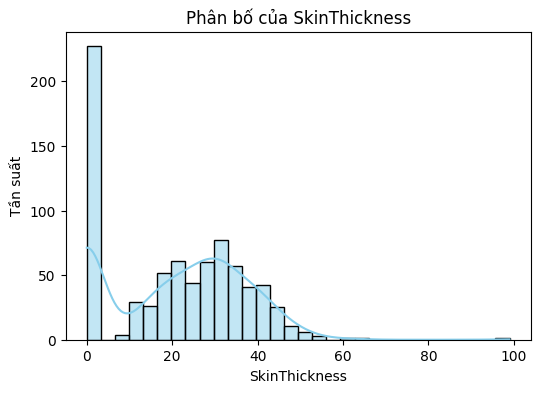

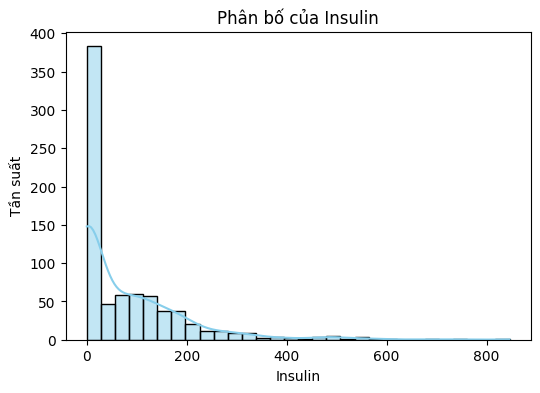

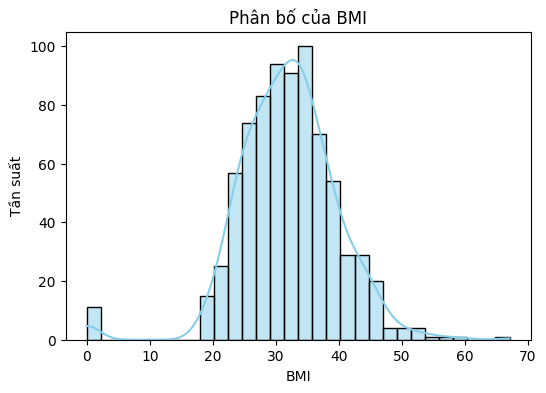

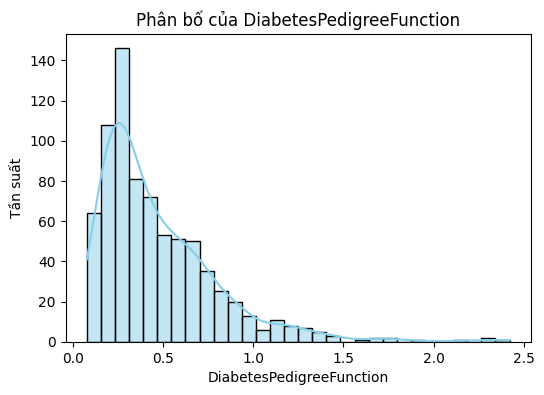

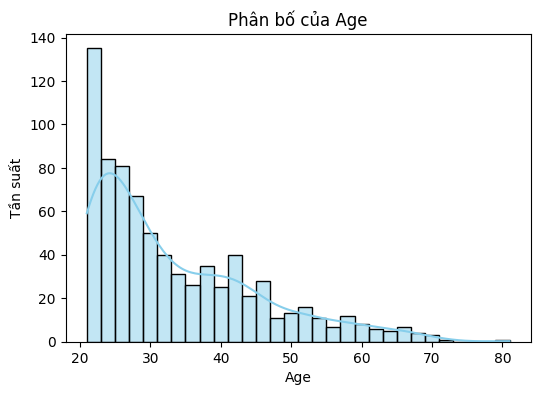

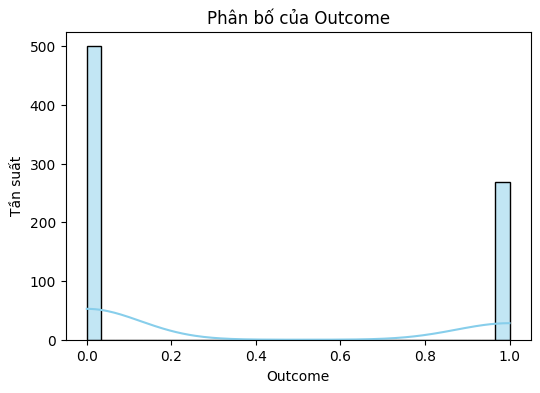

In [ ]:
num_col = df.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()
    # Biểu đồ phân bố của các biến số trong dữ liệu
    #cột dọc là tần suất xuất hiện của các giá trị trong cột ngang
    #kde là đường cong mật độ ước tính, giúp ta thấy được xu hướng
    # biểu đồ này giúp ta thấy được phân bố của các biến số có bị lệch hay không, có outlier hay không
    # từ đó ta có thể quyết định có cần xử lý dữ liệu hay không
    # Lưu ý biểu đồ này chỉ vẽ được kiểu dữ liệu số

In [ ]:
data_copy = df.copy(deep = True) # Tạo bản sao của dữ liệu để tránh làm thay đổi dữ liệu gốc
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan) 
# Vì dữ liệu không có giá trị Nan mà chỉ có giá trị 0 mà những chỉ số y tế ko có giá trị 0 vô lý nghĩa nên ta thay thế giá trị 0 bằng Nan để dễ dàng xử lý

In [ ]:
data_copy.isnull().sum() #sau khi thay kiểm tra lại có bao nhiêu giá trị là 0 bị thế thành Nan

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:

#Cách 1 Xử Lý mising data bằng cách thay thế giá trị Nan bằng giá trị trung bình hoặc trung vị của cột
#Cách này áp dụng khi dữ liệu bị thiếu không quá nhiều (dưới 30%)
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True) #Thay thế giá trị Nan bằng giá trị trung bình của cột
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)#Thay thế giá trị Nan bằng giá trị trung bình của cột
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(),inplace=True)#Thay thế giá trị Nan bằng giá trị trung vị của cột
data_copy['Insulin'].fillna(data_copy['Insulin'].median(),inplace=True)#Thay thế giá trị Nan bằng giá trị trung vị của cột
data_copy['BMI'].fillna(data_copy['BMI'].mean(),inplace=True)#Thay thế giá trị Nan bằng giá trị trung bình của cột


C:\Users\HP\AppData\Local\Temp\ipykernel_13152\268962626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True) #Thay thế giá trị Nan bằng giá trị trung bình của cột
C:\Users\HP\AppData\Local\Temp\ipykernel_13152\268962626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # Kích hoạt IterativeImputer (đang là experimental trong sklearn)
from sklearn.impute import IterativeImputer

# 🔹 Cách 2: Xử lý missing data bằng MICE (Multiple Imputation by Chained Equations)

# Giả sử df đã replace 0 bằng NaN trước đó
data_copy_MICE = df.copy(deep=True)   # Tạo một bản sao dataframe gốc để không làm thay đổi dữ liệu ban đầu

# Các cột có chứa missing (NaN sau khi thay 0)
cols_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay thế giá trị 0 thành NaN trong các cột trên
data_copy_MICE[cols_missing] = data_copy_MICE[cols_missing].replace(0, np.nan)

# Tạo MICE imputer
# - random_state=0: để tái lập kết quả giống nhau khi chạy lại
# - max_iter=10: chạy 10 vòng lặp dự đoán giá trị missing
# - sample_posterior=True: mỗi lần dự đoán sẽ có thêm chút ngẫu nhiên (Bayesian), 
#   giúp tạo ra nhiều bộ dữ liệu hợp lý thay vì chỉ một giá trị duy nhất
imp = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

# Chỉ áp dụng Imputer cho các cột numeric có missing
# MICE sẽ lần lượt dùng các cột còn lại để dự đoán giá trị bị thiếu của từng cột
data_copy_MICE[cols_missing] = imp.fit_transform(data_copy_MICE[cols_missing])

# In 5 dòng đầu tiên sau khi đã xử lý missing
print(data_copy_MICE.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0         35.000  404.235687  33.6   
1            1     85.0           66.0         29.000  101.785577  26.6   
2            8    183.0           64.0         20.114  242.983223  23.3   
3            1     89.0           66.0         23.000   94.000000  28.1   
4            0    137.0           40.0         35.000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


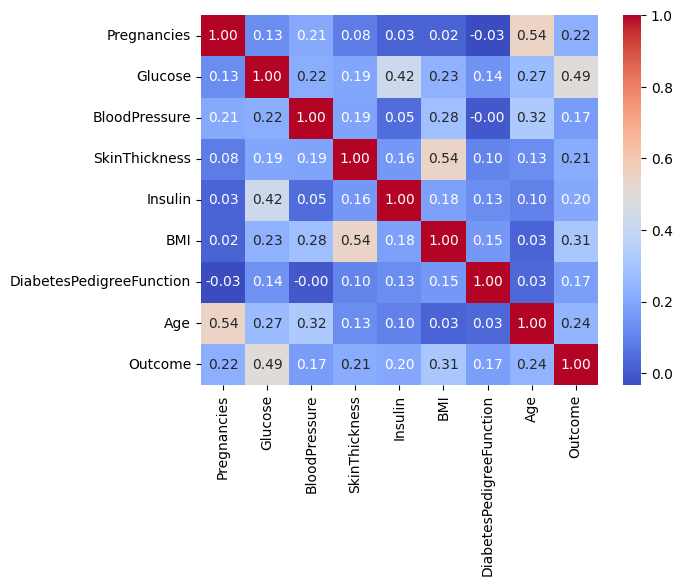

In [ ]:
temp = data_copy.select_dtypes(include=[np.number])
#Biểu đồ heatmap thể hiện mối tương quan giữa các biến số
corr = temp.corr()
plt.Figure(dpi=30)
sns.heatmap(corr,annot=True,fmt='.2f', cmap='coolwarm')
plt.show()
#Cách đọc biểu đồ:
#Dựa vào giá trị để tính độ tương qua giữa các biến số
#giá trị sẽ từ -1 đến 1
#giá trị dương thì nếu biến này tăng thì biến kia cũng tăng
#giá trị âm thì nếu biến này tăng thì biến kia giảm
#giá trị gần 0 thì hai biến không có mối tương quan
#vd: Glucose và Outcome có giá trị 0.49 thì khi Glucose tăng thì khả năng bị tiểu đường cũng tăng

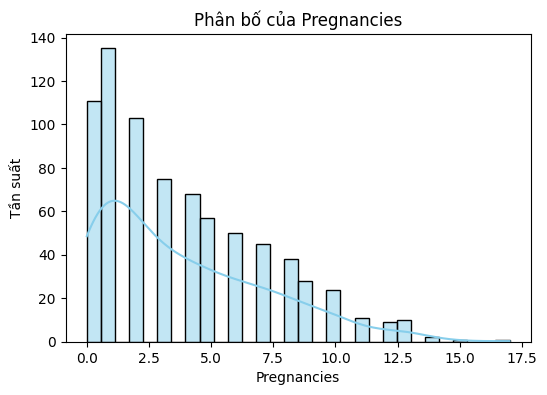

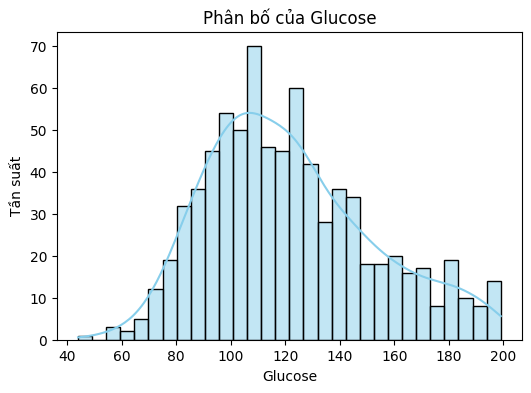

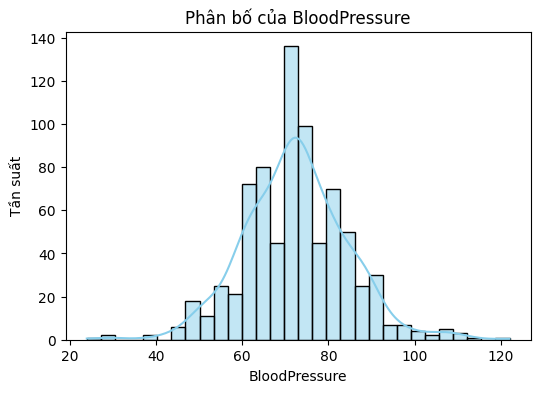

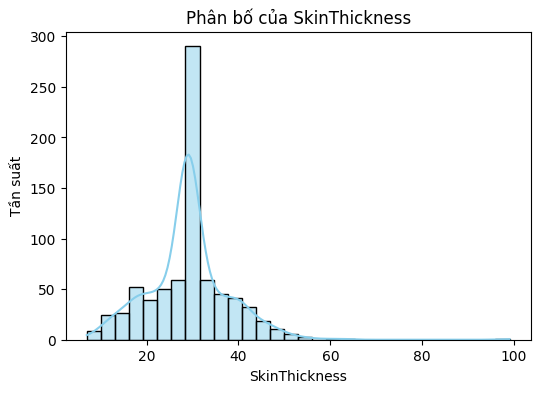

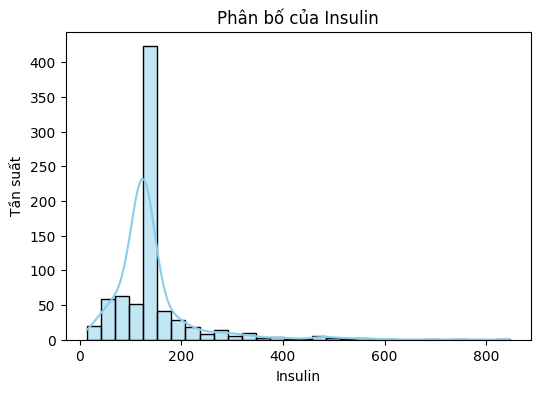

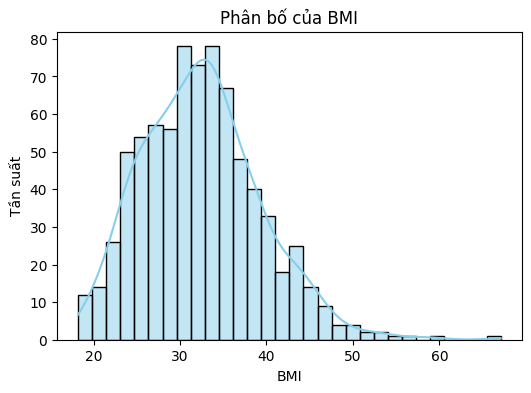

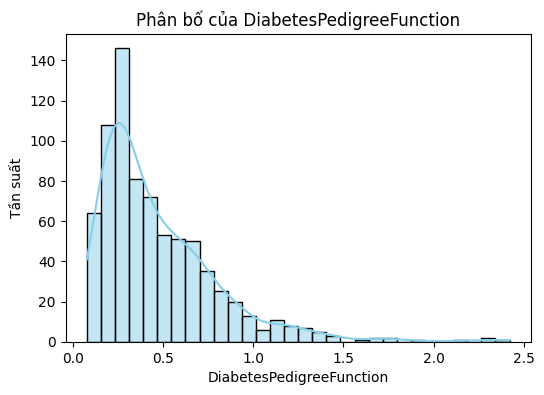

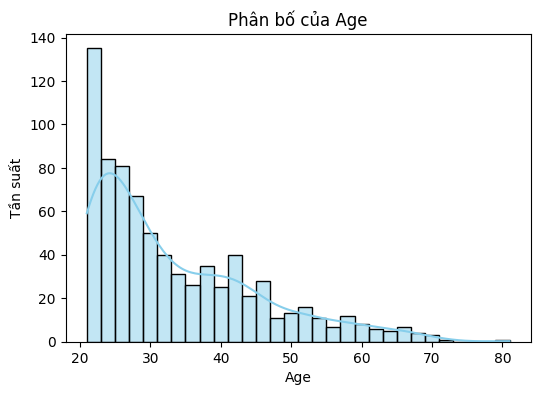

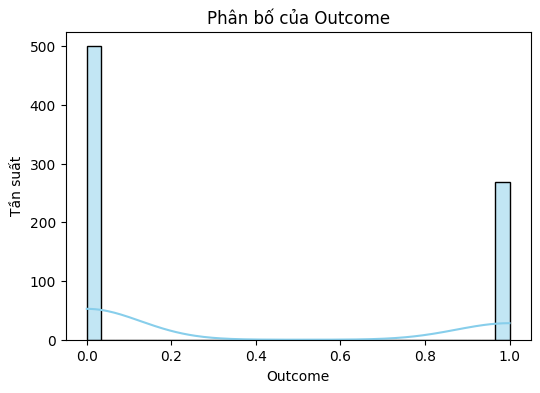

In [ ]:
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()
    # kiểm tra lại phân bố sau khi đã xử lý missing data bằng cách thay thế bằng mean hoặc median

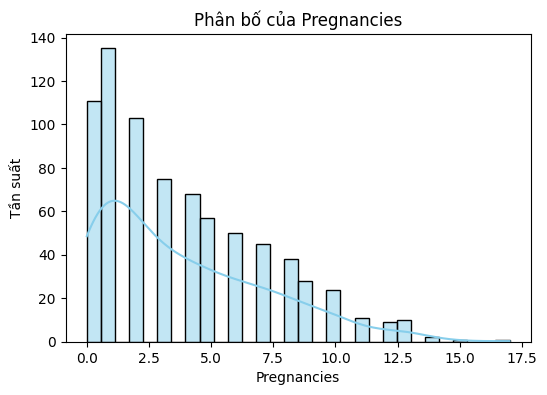

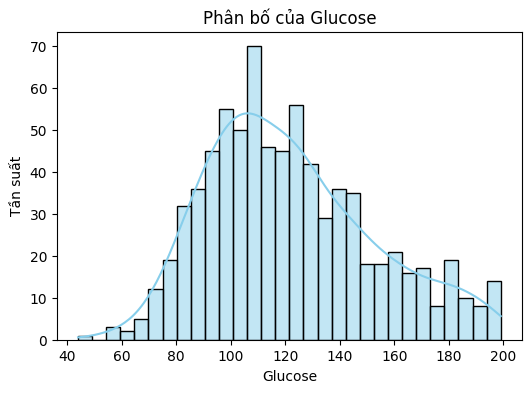

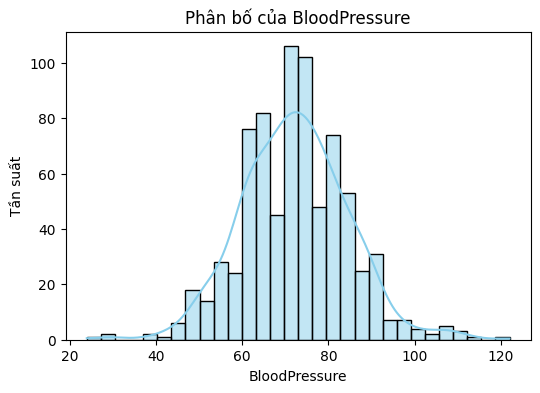

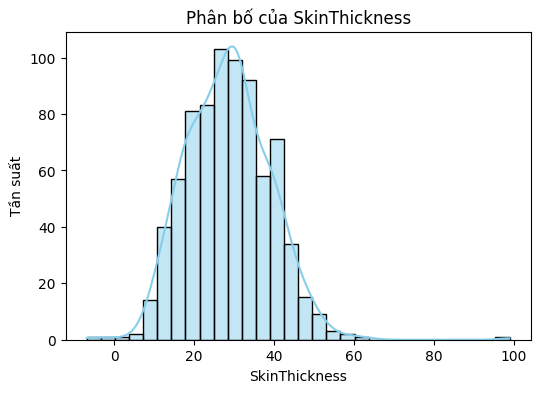

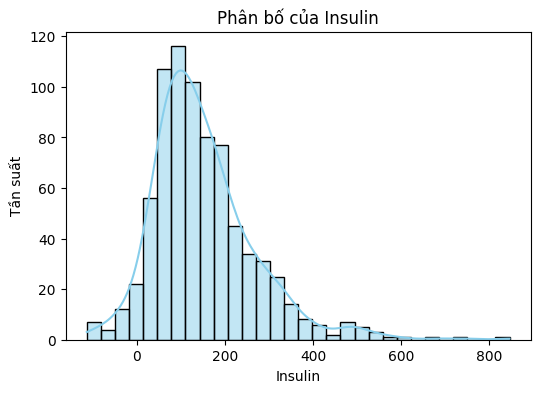

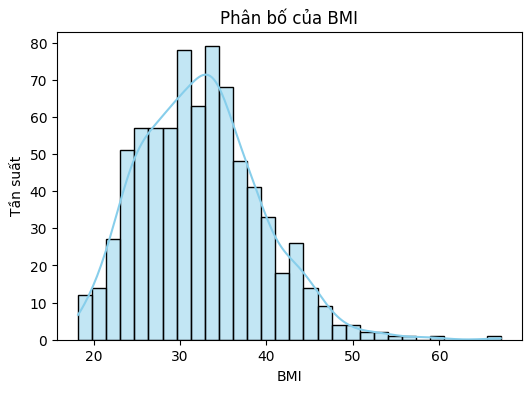

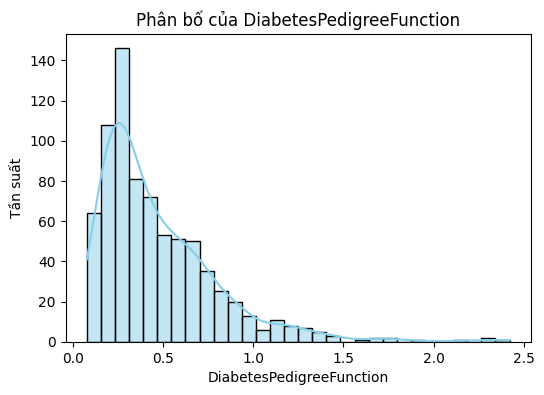

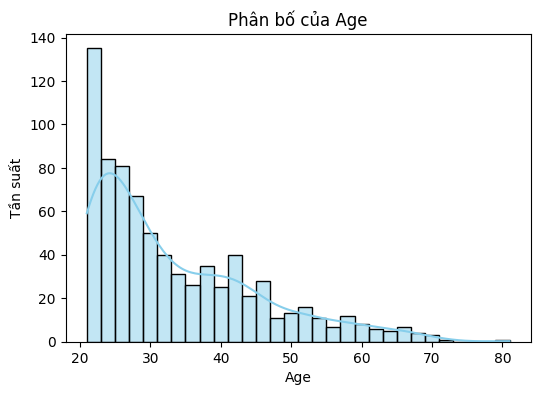

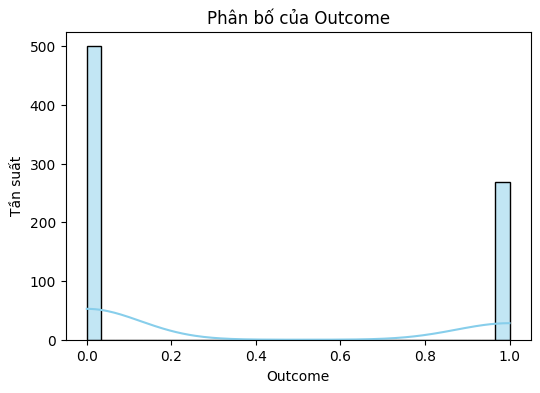

In [ ]:
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data_copy_MICE[col], kde=True, bins=30, color="skyblue")
    plt.title(f'Phân bố của {col}')
    plt.xlabel(col)
    plt.ylabel("Tần suất")
    plt.show()
    # kiểm tra lại phân bố sau khi đã xử lý missing data bằng MICE

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


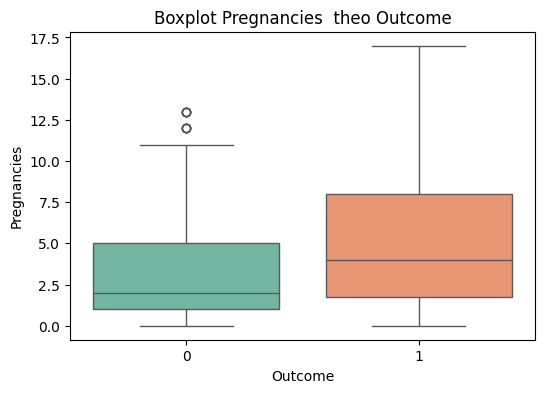

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


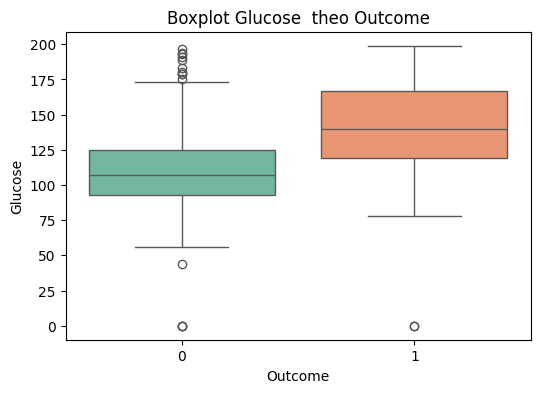

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


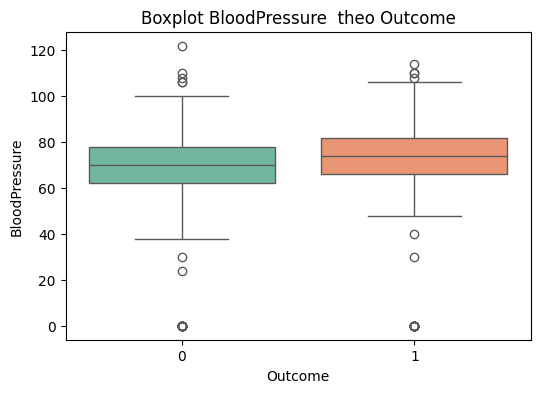

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


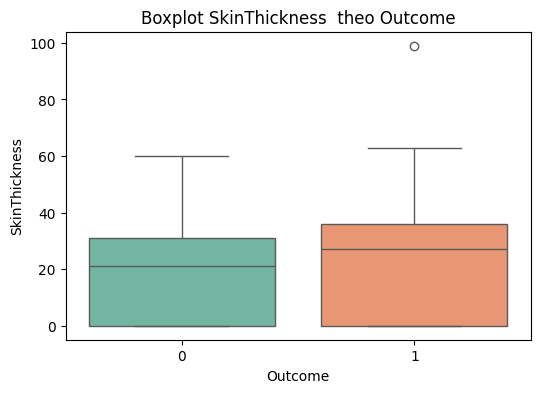

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


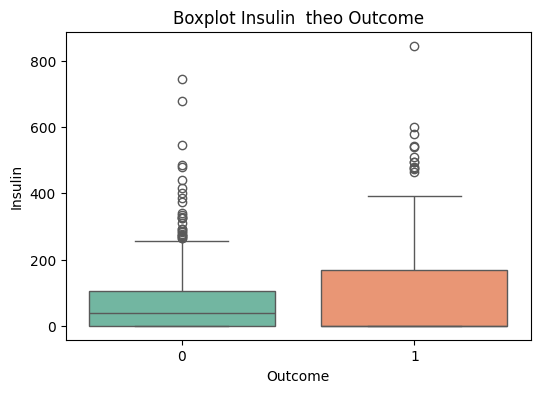

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


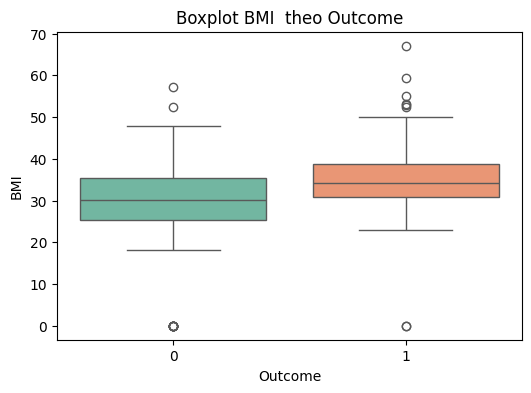

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


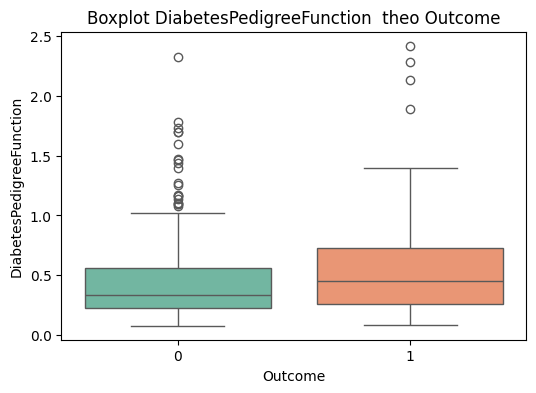

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


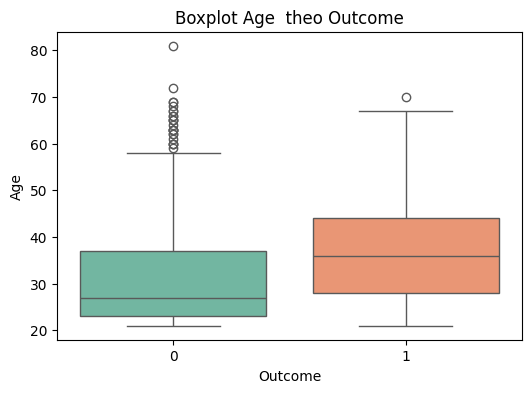

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1812681074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


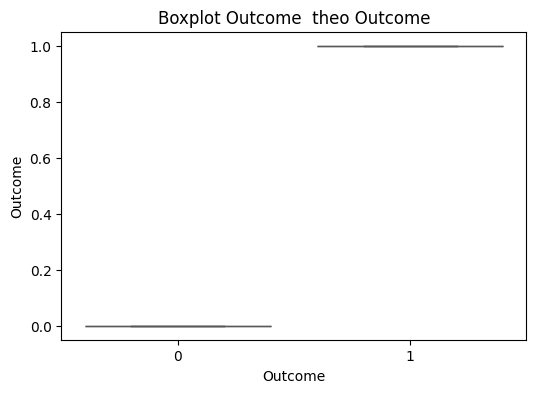

In [ ]:
# Biểu đồ boxplot thể hiện phân bố của các biến số theo biến phân loại Outcome Cách 1
num_col = data_copy.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()
#Cách đọc biểu đồ:
#Cột dọc là giá trị của biến số, cột ngang là biến phân loại Outcome
#Đường ngang ở giữa hộp là median (giá trị ở giữa):giá trị trung vị của biến đó trong mỗi nhóm Outcome.
#Mấy chấm là giá trị nhiễu bất thường
#2 cái đường ngang ở trên và dưới hộp là giá trị giới hạn trên và dưới (không phải max và min)


C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


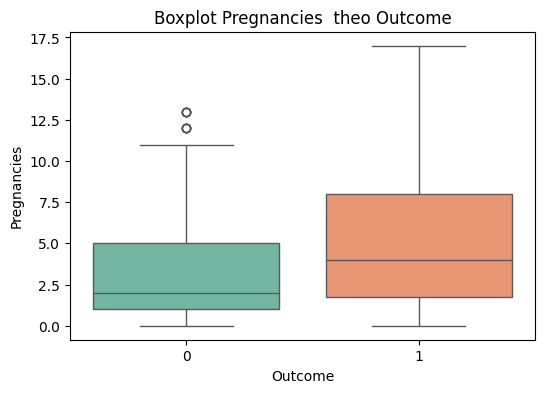

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


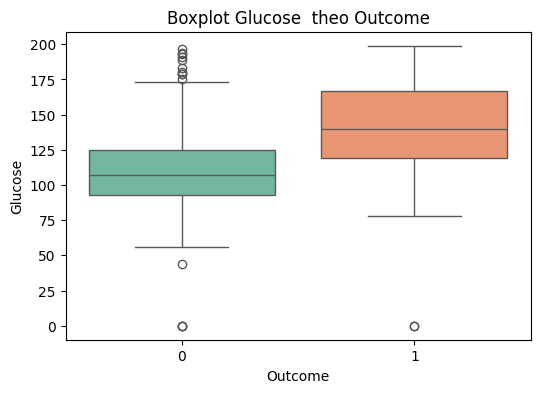

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


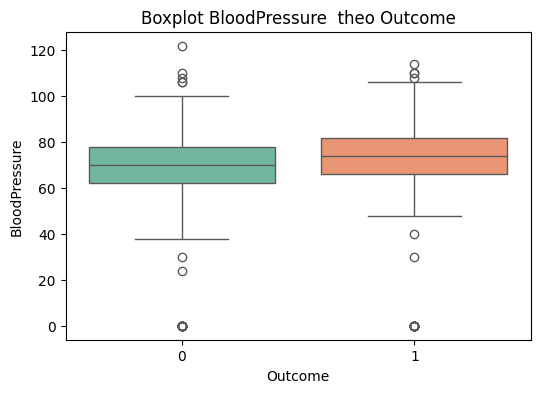

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


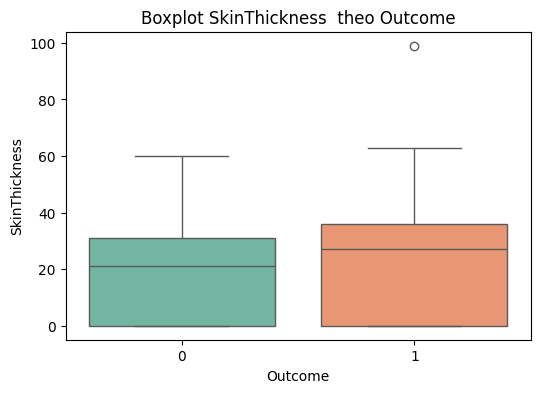

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


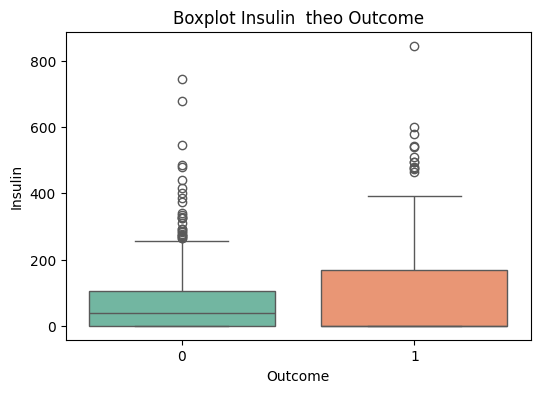

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


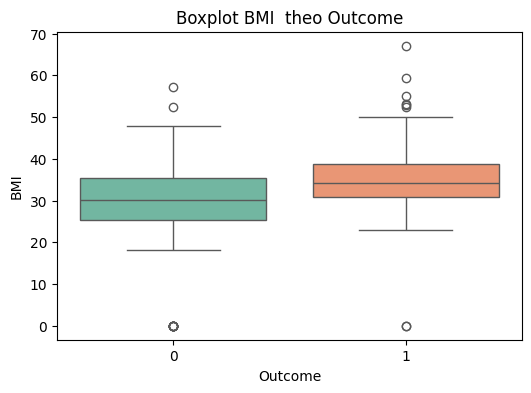

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


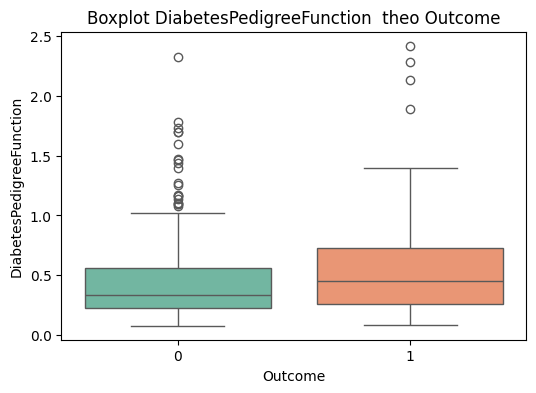

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


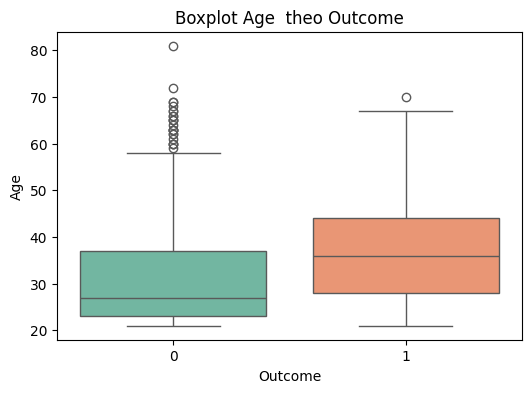

C:\Users\HP\AppData\Local\Temp\ipykernel_13152\1335737851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")


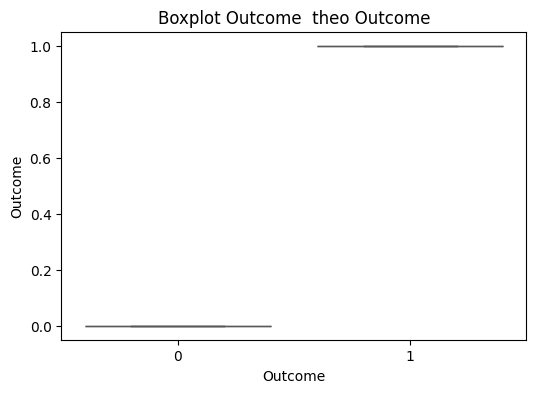

In [ ]:
#cách 2
num_col = data_copy_MICE.select_dtypes(include=[np.number])
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"Boxplot {col}  theo Outcome")
    plt.show()

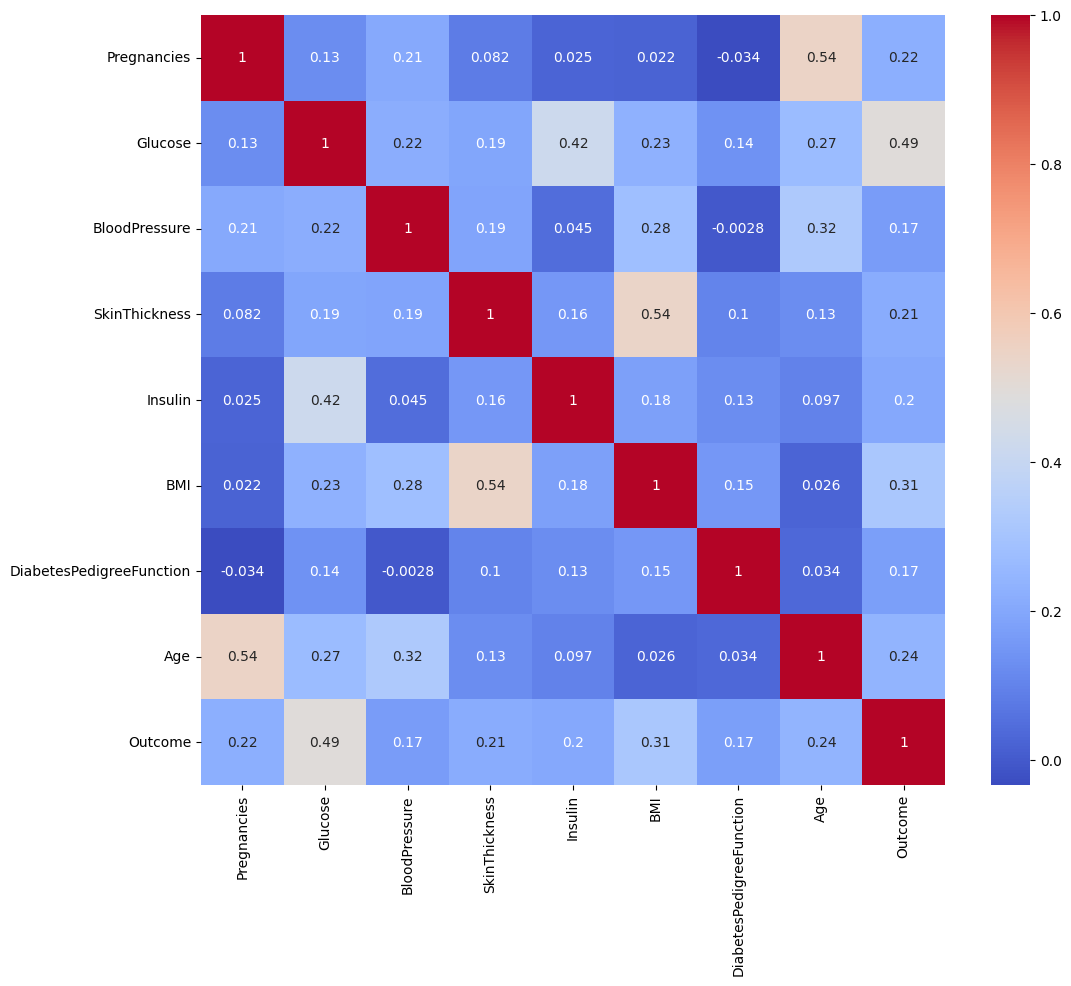

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='coolwarm')
# kiểm tra tính tương quan sau khi đã xử lý missing data cách 1

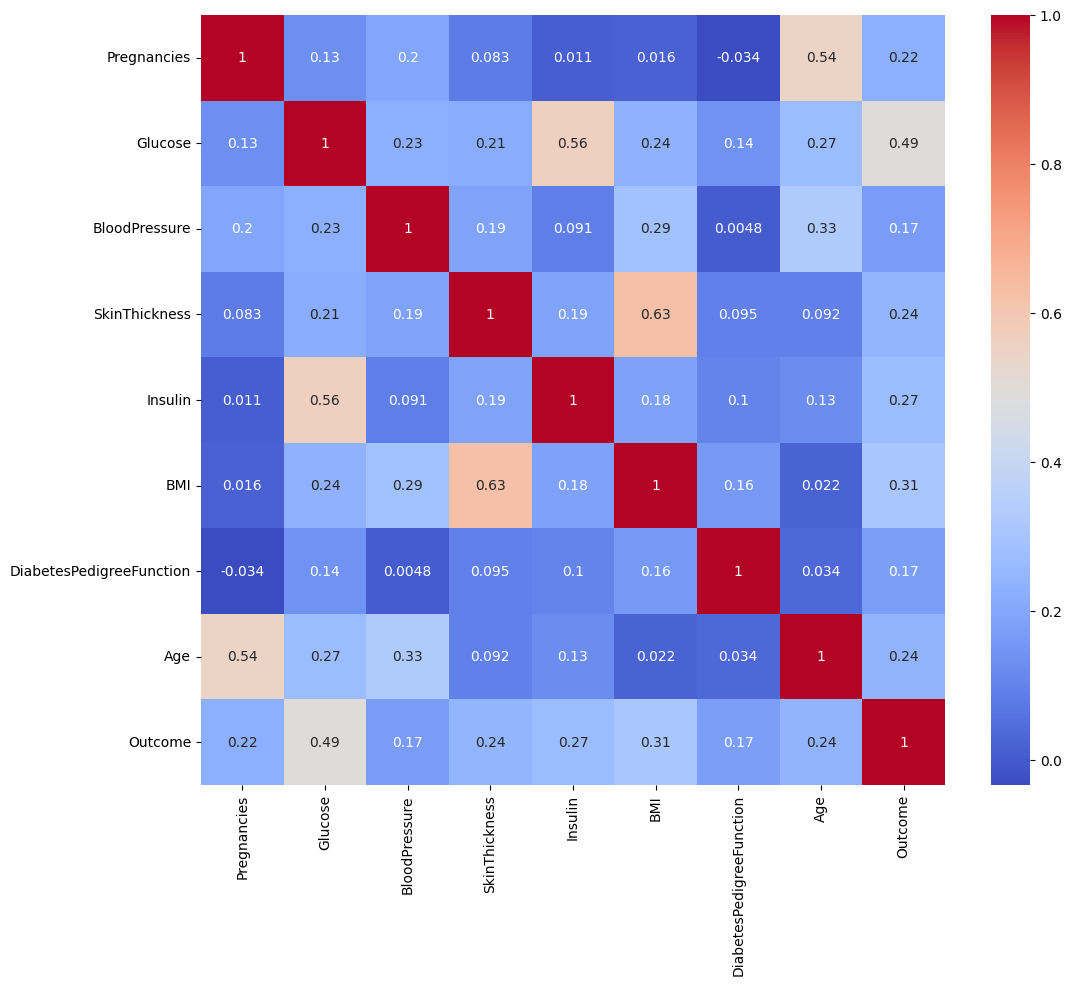

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy_MICE.corr(), annot=True,cmap ='coolwarm')
# kiem tra tính tương quan sau khi đã xử lý missing data cách 2

In [ ]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('Outcome', axis=1)
y = data_copy['Outcome']

X_MIKE = data_copy_MICE.drop('Outcome', axis=1)
y_MIKE = data_copy_MICE['Outcome']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Chuẩn bị dữ liệu cho mô hình ML
X_train_MIKE, X_val_MIKE, y_train_MIKE, y_val_MIKE = train_test_split(
    X_MIKE, y_MIKE, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
#Mô hình cách 1
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
#khoi tạo mô hình LightGBM với các siêu tham số đã được điều chỉnh
model.fit(X_train, y_train) #Cho dữ liệu vào mô hình để huấn luyện

y_val_pred = model.predict(X_val) #Dự đoán trên tập validation


y_pred = model.predict(X_val) #Dự đoán nhãn trên tập validation
y_prob = model.predict_proba(X_val)[:,1] #Dự đoán xác suất thuộc lớp positive (1)

acc = accuracy_score(y_val, y_pred) # Tính độ chính xác
f1 = f1_score(y_val, y_pred) #Tính độ tương quan giữa recall và precision
roc_auc = roc_auc_score(y_val, y_prob) #Tính diện tích dưới đường cong ROC


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [ ]:
#Mô hình cách 2
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
model = LGBMClassifier(objective="binary",        
    boosting_type="gbdt",
    n_estimators=200,
    num_leaves=63,
    max_depth=-1,
    learning_rate=0.05,
    feature_fraction=0.9,
    random_state=42)
model.fit(X_train_MIKE, y_train_MIKE)

y_val_pred = model.predict(X_val_MIKE)


y_pred = model.predict(X_val_MIKE)
y_prob = model.predict_proba(X_val_MIKE)[:,1]

acc = accuracy_score(y_val_MIKE, y_pred)
f1 = f1_score(y_val_MIKE, y_pred)
roc_auc = roc_auc_score(y_val_MIKE, y_prob)


print(f"  Accuracy: {acc:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  ROC AUC:  {roc_auc:.4f}")
print("-" * 30)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi